<a href="https://colab.research.google.com/github/GUEST72/CSC311-Machine-Learning-projects/blob/main/assignment_1/ML_assignment_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📘 K-Nearest Neighbors (KNN)** Classification on MAGIC Telescope Dataset
This project compares a manual implementation of the K-Nearest Neighbors (KNN) algorithm with Scikit-Learn’s implementation, using the MAGIC Gamma Telescope dataset. The objective is to classify particle events as either gamma rays or hadrons



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # To split data into training, validation, and test sets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # To standardize features
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from collections import Counter # used in manual KNN for voting

## Loading and Balancing the Dataset



In [ ]:
# Function to load the dataset from a specified CSV file
def load_dataset(filepath='/telescope_data.csv'):

    data = pd.read_csv(filepath)
    return data

# Load the dataset
telescope_data = load_dataset()

# Display the first 5 rows of the loaded data
print("Original dataset - First 5 rows:")
print(telescope_data.head())

Original dataset - First 5 rows:
   Unnamed: 0   fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0           0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1           1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   
2           2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580   
3           3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   
4           4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   

   fM3Trans   fAlpha     fDist class  
0   -8.2027  40.0920   81.8828     g  
1   -9.9574   6.3609  205.2610     g  
2  -45.2160  76.9600  256.7880     g  
3   -7.1513  10.4490  116.7370     g  
4   21.8393   4.6480  356.4620     g  


In [ ]:
# Separate the dataset into two classes: 'gamma' and 'hadron'
gamma_class_data = telescope_data[telescope_data['class'] == 'g']
hadron_class_data = telescope_data[telescope_data['class'] == 'h']

# Print the original counts of each class to show the imbalance
print(f"\nOriginal class distribution - Gamma: {len(gamma_class_data)}, Hadron: {len(hadron_class_data)}")


# Randomly sample the majority class ('gamma') to match the size of the minority class
gamma_balanced_sample = gamma_class_data.sample(n=len(hadron_class_data), random_state=27)

# Combine the balanced gamma data with the original hadron data to create a balanced dataset
balanced_telescope_data = pd.concat([gamma_balanced_sample, hadron_class_data], ignore_index=True)

print(f"Balanced dataset size: {len(balanced_telescope_data)}")


Original class distribution - Gamma: 12332, Hadron: 6688
Balanced dataset size: 13376


#  Splitting and Scaling the Data

In [ ]:
features = balanced_telescope_data.drop(['class', 'Unnamed: 0'], axis=1).values
labels = balanced_telescope_data['class'].values

# Split the dataset into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(features, labels, test_size=0.15, random_state=27, stratify=labels)# Stratify to maintain class distribution

X_train, X_val, y_train, y_val = train_test_split( X_temp, y_temp, test_size=0.15/(1-0.15), random_state=27 ,stratify=y_temp)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # Fit the scaler on the training data and transform the training data

# Transform the validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Training set size: 9362
Validation set size: 2007
Test set size: 2007


# Implementing Manual KNN

In [ ]:
class ManualKNN:
    def __init__(self, k=3):

        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        # Store a copy of the training data
        self.X_train = X_train.copy()
        self.y_train = y_train.copy()

    def predict_single(self, test_point):
        # Calculate Euclidean distances from the test point to all training points
        distances = np.linalg.norm(self.X_train - test_point, axis=1)

        # Find the indices of the k nearest neighbors
        sorted_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        k_labels = self.y_train[sorted_indices]

        # Count the occurrences of each class label among the k neighbors
        label_counts = Counter(k_labels)

        # Return the most common class label
        return label_counts.most_common(1)[0][0]

    def predict(self, X_test):
        # Apply the predict_single function to each test point
        return np.array([self.predict_single(x) for x in X_test])


# Testing Manual KNN with Different k Values

In [ ]:
print("Testing different k values for Manual K-NN implementation using validation set...")


k_values_to_test = list(range(1, 30)) + list(range(30, 101, 5))
manual_val_accuracies = []

for k in k_values_to_test:

    manual_knn_model = ManualKNN(k=k)
    manual_knn_model.fit(X_train_scaled, y_train)

    val_pred_manual = manual_knn_model.predict(X_val_scaled)

    # Calculate the accuracy of the predictions
    val_accuracy_manual = accuracy_score(y_val, val_pred_manual)
    manual_val_accuracies.append(val_accuracy_manual) # Store the accuracy

    print(f"k={k}: Validation Accuracy = {val_accuracy_manual:.4f}")

# Find the optimal k value that resulted in the highest validation accuracy
optimal_k_manual = k_values_to_test[np.argmax(manual_val_accuracies)]

# Print the optimal k and the corresponding best validation accuracy
print(f"\nOptimal k for Manual K-NN: {optimal_k_manual}")
print(f"Best validation accuracy: {max(manual_val_accuracies):.4f}")

Testing different k values for Manual K-NN implementation using validation set...
k=1: Validation Accuracy = 0.8002
k=2: Validation Accuracy = 0.8002
k=3: Validation Accuracy = 0.8112
k=4: Validation Accuracy = 0.8166
k=5: Validation Accuracy = 0.8181
k=6: Validation Accuracy = 0.8161
k=7: Validation Accuracy = 0.8216
k=8: Validation Accuracy = 0.8236
k=9: Validation Accuracy = 0.8206
k=10: Validation Accuracy = 0.8256
k=11: Validation Accuracy = 0.8196
k=12: Validation Accuracy = 0.8266
k=13: Validation Accuracy = 0.8241
k=14: Validation Accuracy = 0.8261
k=15: Validation Accuracy = 0.8186
k=16: Validation Accuracy = 0.8266
k=17: Validation Accuracy = 0.8251
k=18: Validation Accuracy = 0.8261
k=19: Validation Accuracy = 0.8246
k=20: Validation Accuracy = 0.8256
k=21: Validation Accuracy = 0.8186
k=22: Validation Accuracy = 0.8246
k=23: Validation Accuracy = 0.8176
k=24: Validation Accuracy = 0.8241
k=25: Validation Accuracy = 0.8186
k=26: Validation Accuracy = 0.8181
k=27: Validation 

# Testing Scikit-Learn KNN with Different k Values

In [ ]:
print("Testing different k values for Scikit-Learn K-NN implementation using validation set...")

sklearn_val_accuracies = []

for k in k_values_to_test:

    sklearn_knn_model = KNeighborsClassifier(n_neighbors=k)
    sklearn_knn_model.fit(X_train_scaled, y_train)

    val_pred_sklearn = sklearn_knn_model.predict(X_val_scaled)

    # Calculate the accuracy of the predictions
    val_accuracy_sklearn = accuracy_score(y_val, val_pred_sklearn)
    sklearn_val_accuracies.append(val_accuracy_sklearn) # Store the accuracy

    print(f"k={k}: Validation Accuracy = {val_accuracy_sklearn:.4f}")

# Find the optimal k value that resulted in the highest validation accuracy
optimal_k_sklearn = k_values_to_test[np.argmax(sklearn_val_accuracies)]


print(f"\nOptimal k for Scikit-Learn K-NN: {optimal_k_sklearn}")
print(f"Best validation accuracy: {max(sklearn_val_accuracies):.4f}")

Testing different k values for Scikit-Learn K-NN implementation using validation set...
k=1: Validation Accuracy = 0.8002
k=2: Validation Accuracy = 0.7818
k=3: Validation Accuracy = 0.8112
k=4: Validation Accuracy = 0.8037
k=5: Validation Accuracy = 0.8181
k=6: Validation Accuracy = 0.8067
k=7: Validation Accuracy = 0.8216
k=8: Validation Accuracy = 0.8112
k=9: Validation Accuracy = 0.8206
k=10: Validation Accuracy = 0.8092
k=11: Validation Accuracy = 0.8196
k=12: Validation Accuracy = 0.8161
k=13: Validation Accuracy = 0.8241
k=14: Validation Accuracy = 0.8161
k=15: Validation Accuracy = 0.8186
k=16: Validation Accuracy = 0.8201
k=17: Validation Accuracy = 0.8251
k=18: Validation Accuracy = 0.8191
k=19: Validation Accuracy = 0.8246
k=20: Validation Accuracy = 0.8171
k=21: Validation Accuracy = 0.8186
k=22: Validation Accuracy = 0.8156
k=23: Validation Accuracy = 0.8176
k=24: Validation Accuracy = 0.8142
k=25: Validation Accuracy = 0.8186
k=26: Validation Accuracy = 0.8151
k=27: Valid

# Plotting Accuracy vs k

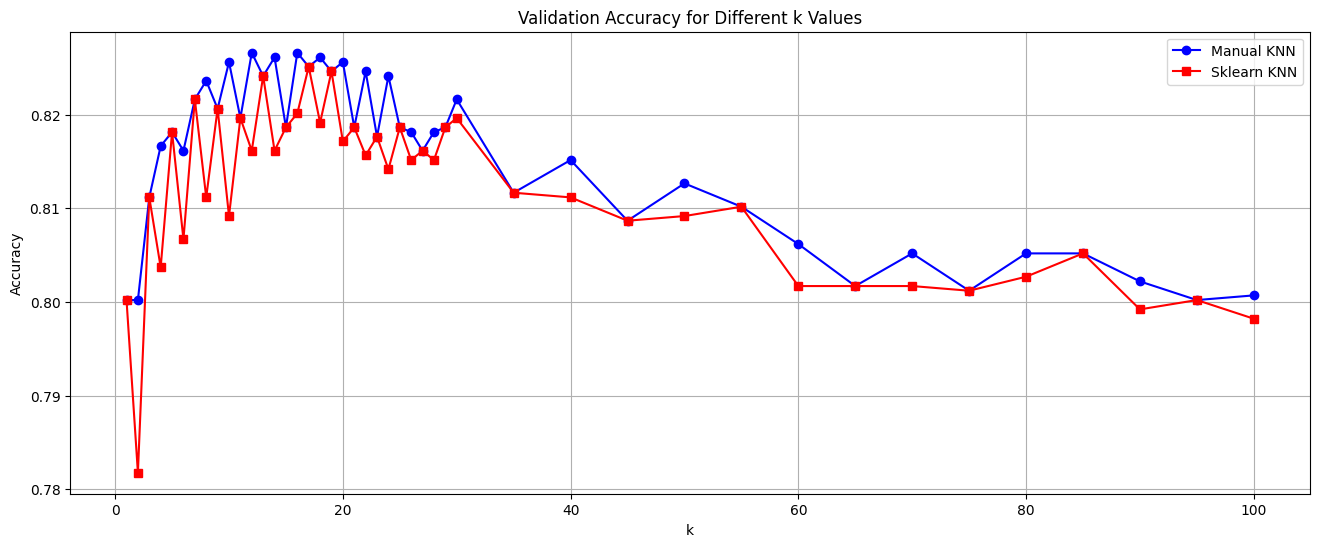

In [ ]:
def plot_knn_accuracies(k_vals, manual_acc, sklearn_acc, best_k_manual, best_k_sklearn):
    plt.figure(figsize=(16, 6))
    plt.plot(k_vals, manual_acc, 'bo-', label=f'Manual KNN')
    plt.plot(k_vals, sklearn_acc, 'rs-', label=f'Sklearn KNN')
    plt.title('Validation Accuracy for Different k Values')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the results
plot_knn_accuracies(k_values_to_test, manual_val_accuracies, sklearn_val_accuracies, optimal_k_manual, optimal_k_sklearn)


# Defining Model Evaluation Metrics

In [ ]:
def evaluate_model__manual(y_true, y_pred):
    # Count correct predictions for accuracy
    correct = np.sum(y_true == y_pred)
    accuracy = correct / len(y_true)

    # For precision, recall, f1 - focus on gamma class ('g')
    tp = np.sum((y_true == 'g') & (y_pred == 'g'))  # True Positives
    fp = np.sum((y_true == 'h') & (y_pred == 'g'))  # False Positives
    fn = np.sum((y_true == 'g') & (y_pred == 'h'))  # False Negatives
    tn = np.sum((y_true == 'h') & (y_pred == 'h'))  # True Negatives

    # Calculate metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall)


    print(f"\n- Manual Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Confusion Matrix: TP={tp}, FP={fp}, FN={fn}, TN={tn}")

    return {'accuracy': accuracy,'precision': precision, 'recall': recall,'f1_score': f1_score,}




In [ ]:
def evaluate_model_sklearn(y_true, y_pred):
    pos_label='g'
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=pos_label)
    recall = recall_score(y_true, y_pred, pos_label=pos_label)
    f1 = f1_score(y_true, y_pred, pos_label=pos_label)

    print(f"\n - SKLEARN EVALUATION:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

# Confusion Matrix Function

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title: str ):

    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=["Hadron (h)", "Gamma (g)"], cmap='Blues', colorbar=False)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    return disp.confusion_matrix

# ✅ Final Evaluation on Test Set - Manual KNN

FINAL EVALUATION ON TEST SET - MANUAL K-NN

- Manual Evaluation:
Accuracy: 0.7853
Precision: 0.7411
Recall: 0.8764
F1-Score: 0.8031
Confusion Matrix: TP=879, FP=307, FN=124, TN=697


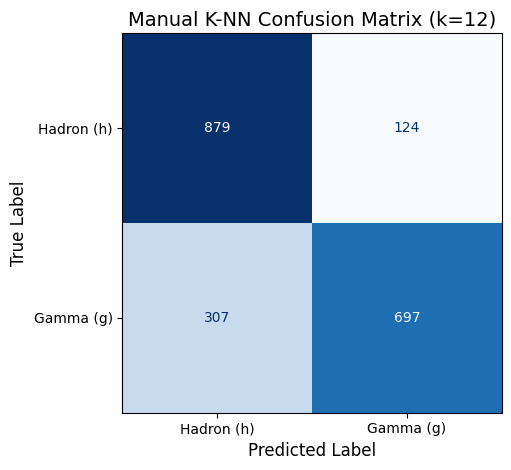

In [ ]:
print("FINAL EVALUATION ON TEST SET - MANUAL K-NN")
print("="*60)

final_manual_knn_model = ManualKNN(k=optimal_k_manual)
final_manual_knn_model.fit(X_train_scaled, y_train)

manual_test_predictions = final_manual_knn_model.predict(X_test_scaled)

manual_evaluation_metrics = evaluate_model__manual(y_test, manual_test_predictions)

# Plot the confusion matrix for the manual K-NN model on the test set
manual_confusion_matrix = plot_confusion_matrix(y_test, manual_test_predictions,f"Manual K-NN Confusion Matrix (k={optimal_k_manual})")

# ✅ Final Evaluation on Test Set - Scikit-Learn KNN

FINAL EVALUATION ON TEST SET - SCIKIT-LEARN K-NN

 - SKLEARN EVALUATION:
Accuracy: 0.8057
Precision: 0.7609
Recall: 0.8913
F1-Score: 0.8209


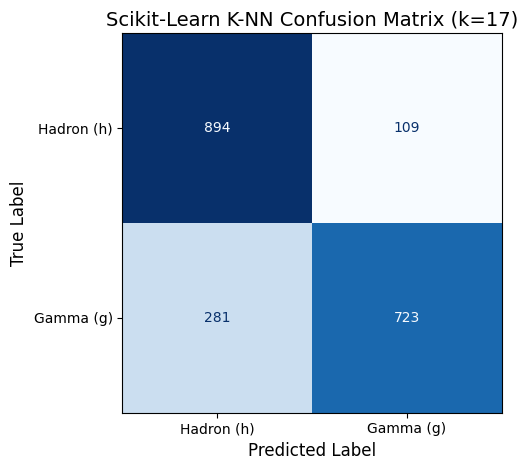

In [ ]:
print("FINAL EVALUATION ON TEST SET - SCIKIT-LEARN K-NN")
print("="*60)

final_sklearn_knn_model = KNeighborsClassifier(n_neighbors=optimal_k_sklearn)
final_sklearn_knn_model.fit(X_train_scaled, y_train)

sklearn_test_predictions = final_sklearn_knn_model.predict(X_test_scaled)

sklearn_evaluation_metrics = evaluate_model_sklearn(y_test, sklearn_test_predictions)

# Plot the confusion matrix for the Scikit-Learn K-NN model on the test set
sklearn_confusion_matrix = plot_confusion_matrix(y_test, sklearn_test_predictions, f"Scikit-Learn K-NN Confusion Matrix (k={optimal_k_sklearn})")

# Bias-Variance Analysis: Detecting Overfitting and Underfitting

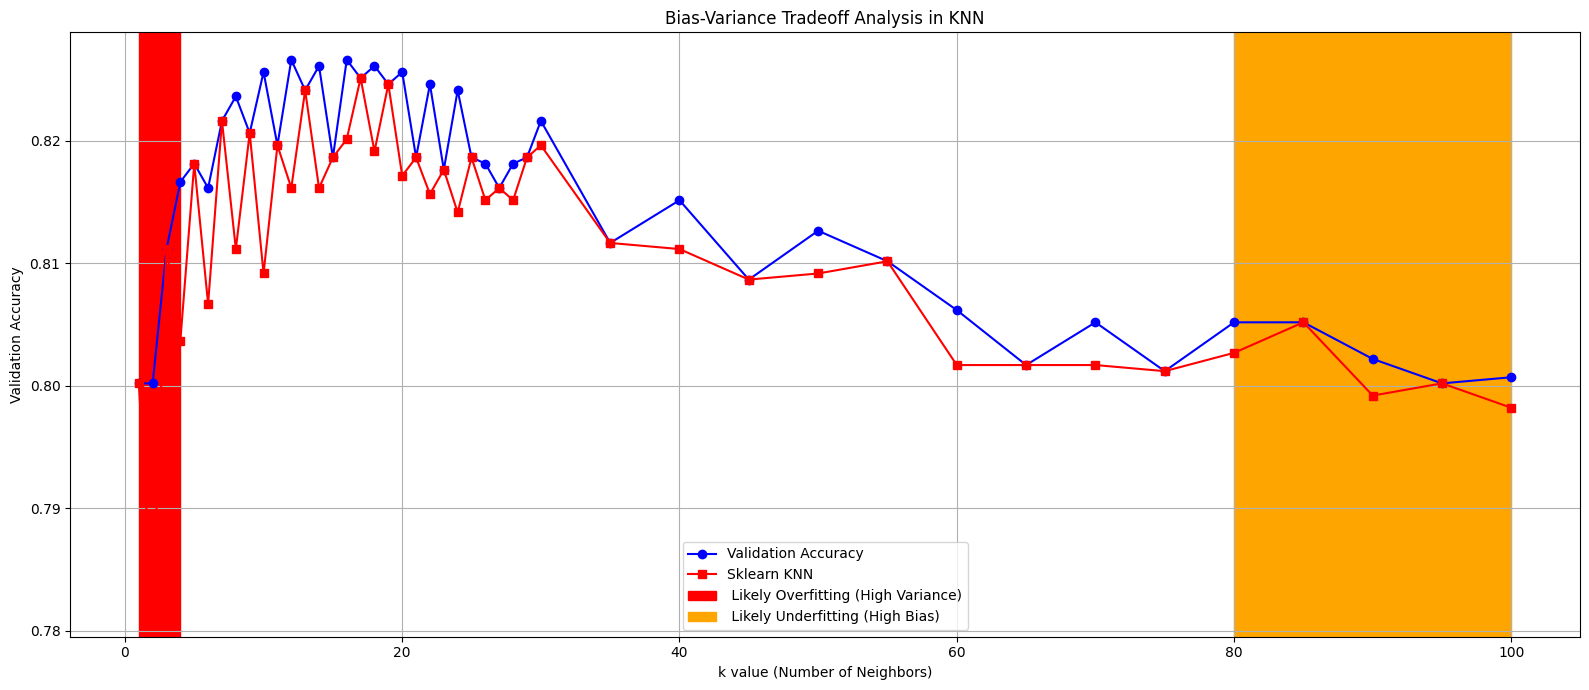

In [ ]:
def analyze_bias_variance(k_values_to_test, manual_val_accuracies):
    plt.figure(figsize=(16,7))

    plt.plot(k_values_to_test, manual_val_accuracies, 'bo-', label='Validation Accuracy')
    plt.plot(k_values_to_test,sklearn_val_accuracies,'rs-', label=f'Sklearn KNN')


    plt.xlabel('k value (Number of Neighbors)')
    plt.ylabel('Validation Accuracy')
    plt.title('Bias-Variance Tradeoff Analysis in KNN')
    plt.grid(True)

    # Visual regions for overfitting and underfitting
    plt.axvspan(k_values_to_test[0], k_values_to_test[3], color='red', label=' Likely Overfitting (High Variance)')
    plt.axvspan(k_values_to_test[-5], k_values_to_test[-1], color='orange', label=' Likely Underfitting (High Bias)')

    plt.legend()
    plt.tight_layout()
    plt.show()

analyze_bias_variance(k_values_to_test, manual_val_accuracies)

# Insights and Performance Analysis

In [ ]:
print("FINAL COMPARISON OF TEST SET RESULTS")
print("="*60)
# Create a DataFrame to compare the evaluation metrics of the two models
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],

    'Manual K-NN': [manual_evaluation_metrics['accuracy'], manual_evaluation_metrics['precision'], manual_evaluation_metrics['recall'], manual_evaluation_metrics['f1_score']],

    'Scikit-Learn K-NN': [sklearn_evaluation_metrics['accuracy'], sklearn_evaluation_metrics['precision'],sklearn_evaluation_metrics['recall'], sklearn_evaluation_metrics['f1_score']]
})

print(comparison_df.round(4))

# Analyze the performance difference
print("\n DETAILED ANALYSIS OF PERFORMANCE DIFFERENCE:")
accuracy_diff = abs(manual_evaluation_metrics['accuracy'] - sklearn_evaluation_metrics['accuracy'])
print(f"• Absolute Accuracy Difference: {accuracy_diff:.4f}")


# Print the optimal k values found for each model
print(f"• Optimal k value for Manual K-NN: {optimal_k_manual}")
print(f"• Optimal k value for Scikit-Learn K-NN: {optimal_k_sklearn}")

FINAL COMPARISON OF TEST SET RESULTS
      Metric  Manual K-NN  Scikit-Learn K-NN
0   Accuracy       0.7853             0.8057
1  Precision       0.7411             0.7609
2     Recall       0.8764             0.8913
3   F1-Score       0.8031             0.8209

 DETAILED ANALYSIS OF PERFORMANCE DIFFERENCE:
• Absolute Accuracy Difference: 0.0204
• Optimal k value for Manual K-NN: 12
• Optimal k value for Scikit-Learn K-NN: 17


# Conclusion
## Based on the test results:

* Both models show high accuracy and good classification ability.

* The Scikit-Learn implementation is highly optimized for performance and efficiency, especially for larger datasets..

* The optimal k values for both methods are selected using validation data.

* Ultimately, both implementations perform similarly, with minor accuracy differences.


